An interesting application of our Bayesian Approach, the author of Think Bayes introduces a toy problem where we've got a bag of D&D dice, randomly select a die and roll it. From here, we want to know the probability that the die was a `d4, d6, ..., d20`.

What makes this problem novel/interesting is how repeated rolls of the selected die allow us to update our estimation.

### Rolled a 6

In the simple case, imagine that we pulled out a die and rolled a 6.

Let's construct our table as before.

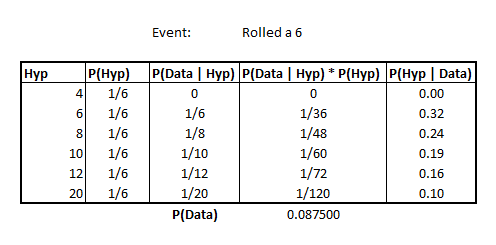

In [1]:
from IPython.display import Image

Image('images/die_6.PNG')

The hypothesis is simply all of the "d`N`" values and our prior, `P(Hyp)` is simply a uniform distribution of `1/n` where `n` is the number of different possible dice.

Then, filling in the value for our likelihoods, `P(Data | Hyp)`, is a matter of setting to `0` if the die can't attain the number (as with the `d4`), or `1/faces`, per die.

The last two columns are our usual plug-and-chug.

Note that our most likely candidate is the `d6` at this point.

### Rolling again, 8

Imagine now, that we re-reroll that die and get an 8. Not only does this rule out the possibility of it being a `d6`, it also *reinforces* whatever posterior distribution that we've formed to this point.

What the author shows computationally, but doesn't belabor, is that we essentially redo our table method, but crucially, **using the Posterior Distribution of having rolled a 6, as our prior.**

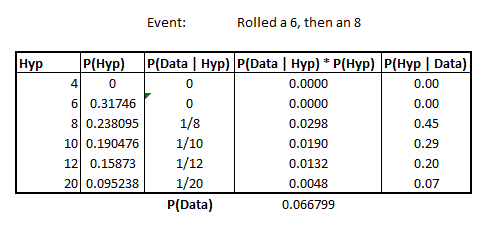

In [2]:
Image('images/dice_6_then_8.PNG')

It shouldn't be a shocking characteristic, but perhaps merits mentioning that if we'd instead rolled an 8 and then a 6, we'd have the same posterior distribution for "having rolled a 6 and an 8", regardless of the order

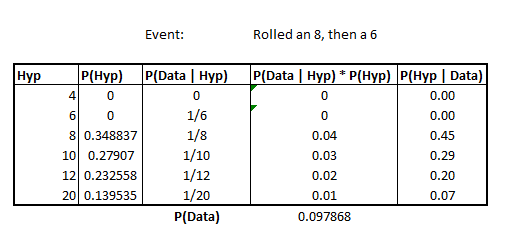

In [3]:
Image('images/dice_8_then_6.PNG')

This is simply due to the Commutative property that we get through independence of the results.

### Rolling again, 13

Continuing, we re-roll the die a third time and it shows 13. As you'd expect, this excludes `d4, d6, d8, d10` and basically normalizes the probability of being `d12` or `d20` to sum to 1.

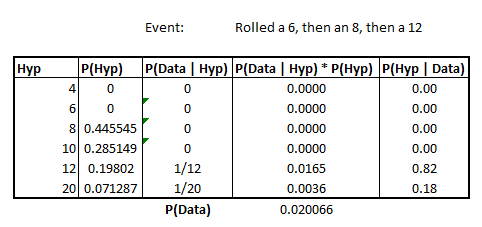

In [4]:
Image('images/dice_8_then_6_then_12.PNG')

## Object Oriented

By now, the "Table method" should be pretty straight-forward. The only trickiness lies in appropriate coding of the Likelihood column.

To facilitate ease of computation and cut back on code reuse, the author builds out a `Suite` object to basically hold the contents of these tables. However, when he does it, he kind of dumps a bunch of code, scattered out over 15 or so pages-- and never together. Reading examples is a mess without having the whole object in front of you (lots of references to object attributes, but without the `self.`, and vice-versa).

Basically, the idea is:

* Instantiate a class with your priors
* Code up the Likelihood function

Then the class gives you access to a useful `.Normalize()` method, which will scale your prior probabilities such that they add up to 1.

Then we get access to an `.Update()` method, which takes in observed "Data"

Like in the third column of our Table Method, the class looks up the Likelihood of seeing our Data, given our Hypothesis. But then under the hood, it uses these values to multiply by our Priors, and then call `.Normalize()` once more, essentially doing all of the last 3 columns in one shot.

Once you get the hang of the design (and upgrade from Python 2...), the value of building out the `Suite` object becomes obvious when calling such code

``` python
from dicebag import DiceBag

bag = DiceBag()

for roll in [6, 8, 7, 7, 5, 4]:
    bag.Update(roll)

```

and all of the posteriors are automatically carried forward as the next call's priors, or can be output after all of your rolls are complete to get your final conjoint posterior probabilities.